# Classic classification algorithms

We are going to classify our datasets using multiple classification algorithms and evaluate their performances.

In [1]:
# Packages to install
packages_to_install = ['scikit-learn', 'imblearn', 'deslib']

# Check if they are already installed
import importlib
for package in packages_to_install:
    try:
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} is not installed. Installing...")
        !pip install {package}

scikit-learn is not installed. Installing...



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


imblearn is already installed.
deslib is already installed.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

## Load Dataset

In [14]:
x1 = pd.read_csv("./Ressources/Datasets/stand_norm_e1.txt", header=None, delimiter=" ")
x2 = pd.read_csv("./Ressources/Datasets/stand_norm_e2.txt", header=None, delimiter=" ", names=[8, 9, 10, 11, 12, 13, 14])
y = pd.read_csv("./Ressources/Datasets/y2_e1.txt", header=None, delimiter=" ", names=["label"])
x = pd.concat([x1, x2], axis=1)
x = x[1:]

x.describe()

,0,1,2,3,4,5,6,8,9,10,11,12,13,14
count,12810,12810,12810,12810,12810,12810,12810,12810,12810,12810,12810,12810,12810,12810
unique,12792,12810,12809,12810,12810,12724,12710,12792,12810,12809,12810,12810,12724,12717
top,0.590555,220.110174,21.125644,714.120693,3719.146472,0.000000,0.705523,0.476584,345.489585,8.802629,353.379868,679.766033,0.000000,0.425668
freq,2,1,2,1,1,6,2,2,1,2,1,1,6,2


In [15]:
# Splitting the dataset into training and test set.  
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.25, random_state=0)

# Feature Scaling
# Adjust the mean to 0 and the standard deviation to 1
st_x = StandardScaler()    
x_train = st_x.fit_transform(x_train)    
x_test = st_x.transform(x_test)  


In [16]:
# Oversample to have same number of samples of each class
smote = SMOTE()
x_train_sampled, y_train_sampled = smote.fit_resample(x_train, y_train)

We are going to extract features from the datasets using the PCA method

In [ ]:
pca = PCA(n_components=None)

x_train_sampled_pca = pca.fit(x_train_sampled)

In [ ]:
import matplotlib.pyplot as plt

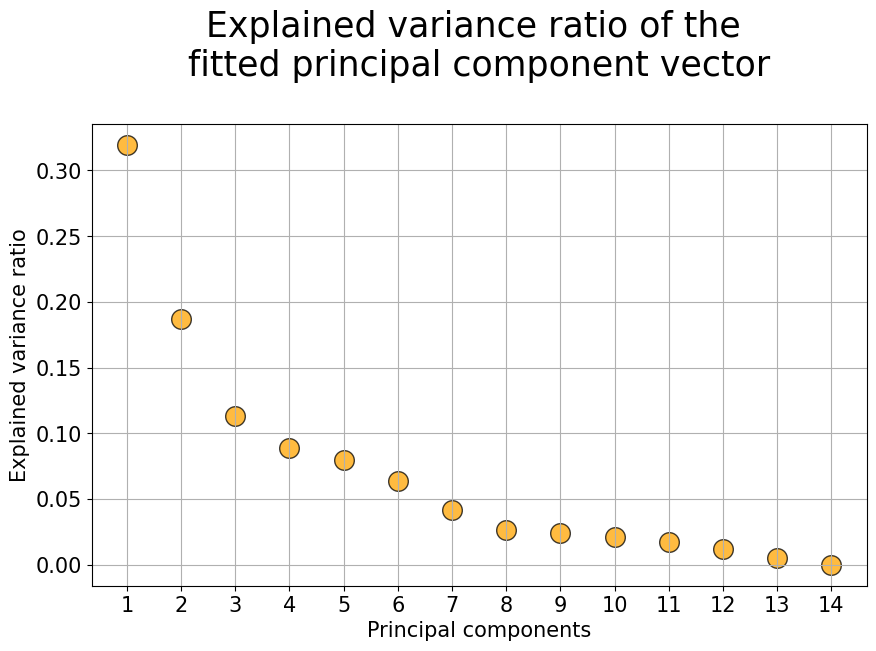

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(x_train_sampled_pca.explained_variance_ratio_))],
            y=x_train_sampled_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(x_train_sampled_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

Here, we can see that the first 4 components have higher ratios, which means that these features primarily influence the outcome (?). So, we could keep only these first 4 components.

In [ ]:
# Modify the number of components to keep only those that are useful.
pca.n_components = 4

x_train_sampled_pca = pca.transform(x_train_sampled)
x_test_pca = pca.transform(x_test) 

## Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators= 20, criterion="entropy", class_weight="balanced")  
# random_forest.fit(x_train_sampled, y_train_sampled.ravel())
random_forest.fit(x_train_sampled_pca, y_train_sampled.ravel())

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=20)

In [ ]:
# Predicting the test set result  
y_pred = random_forest.predict(x_test_pca)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cr)
print(cm)


              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      2511
         1.0       0.53      0.56      0.55       682
         2.0       0.12      0.10      0.11        10

    accuracy                           0.80      3203
   macro avg       0.51      0.51      0.51      3203
weighted avg       0.80      0.80      0.80      3203

[[2167  337    7]
 [ 299  383    0]
 [   8    1    1]]


## Logistic Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression = LogisticRegression(class_weight="balanced")

logistic_regression.fit(x_train_sampled_pca, y_train_sampled.ravel())

LogisticRegression(class_weight='balanced')

In [ ]:
# Prediction on the test set
y_pred = logistic_regression.predict(x_test_pca)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.88      0.67      0.76      2511
         1.0       0.36      0.40      0.38       682
         2.0       0.01      0.30      0.01        10

    accuracy                           0.61      3203
   macro avg       0.41      0.46      0.38      3203
weighted avg       0.77      0.61      0.68      3203

[[1689  482  340]
 [ 225  270  187]
 [   5    2    3]]


## K-Nearest Neighbours (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20, weights="uniform")

knn.fit(x_train_sampled_pca, y_train_sampled.ravel())

KNeighborsClassifier(n_neighbors=20)

In [ ]:
# Prediction on the test set
y_pred = knn.predict(x_test_pca)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80      2511
         1.0       0.44      0.75      0.56       682
         2.0       0.02      0.30      0.04        10

    accuracy                           0.71      3203
   macro avg       0.46      0.58      0.46      3203
weighted avg       0.82      0.71      0.74      3203

[[1752  643  116]
 [ 136  514   32]
 [   3    4    3]]


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier(class_weight="balanced")

decision_tree.fit(x_train_sampled_pca, y_train_sampled)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
y_pred = decision_tree.predict(x_test_pca)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.87      0.81      0.83      2511
         1.0       0.44      0.53      0.48       682
         2.0       0.06      0.20      0.09        10

    accuracy                           0.75      3203
   macro avg       0.45      0.51      0.47      3203
weighted avg       0.77      0.75      0.76      3203

[[2023  466   22]
 [ 309  364    9]
 [   4    4    2]]


# Best classifier selection

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
voting_clf = VotingClassifier(estimators=[('rf', random_forest), ('knn', knn), ('arbre decisionnel', decision_tree), ('logistic regression', logistic_regression)], voting='soft')
voting_clf.fit(x_train_sampled_pca, y_train_sampled)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     n_estimators=20)),
                             ('knn', KNeighborsClassifier(n_neighbors=20)),
                             ('arbre decisionnel',
                              DecisionTreeClassifier(class_weight='balanced')),
                             ('logistic regression',
                              LogisticRegression(class_weight='balanced'))],
                 voting='soft')

In [ ]:
y_pred = voting_clf.predict(x_test_pca)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cr)
print(cm)

Voting Classifier Accuracy: 0.7674055572900406
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      2511
         1.0       0.48      0.59      0.53       682
         2.0       0.06      0.20      0.09        10

    accuracy                           0.77      3203
   macro avg       0.47      0.54      0.49      3203
weighted avg       0.79      0.77      0.78      3203

[[2054  437   20]
 [ 267  402   13]
 [   4    4    2]]


## DESlib library
We are using the DESlib library to select the best classifier.

In [ ]:
from deslib.des.des_clustering import DESClustering

In [ ]:
des = DESClustering(pool_classifiers=[knn, random_forest, decision_tree])
des.fit(x_train_sampled_pca, y_train_sampled.ravel())

DESClustering(pool_classifiers=[KNeighborsClassifier(n_neighbors=20),
                                RandomForestClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       n_estimators=20),
                                DecisionTreeClassifier(class_weight='balanced')])

In [ ]:
y_pred = des.predict(x_test_pca)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.87      0.81      0.83      2511
         1.0       0.44      0.53      0.48       682
         2.0       0.06      0.20      0.09        10

    accuracy                           0.75      3203
   macro avg       0.45      0.51      0.47      3203
weighted avg       0.77      0.75      0.76      3203

[[2023  466   22]
 [ 309  364    9]
 [   4    4    2]]
